In [ ]:
import cv2,os
data_path=r'D:\VIT\SEM 3\WT\E-Waste-Facility-Locator-Final\train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Camera': 0, 'Keyboards': 1, 'Laptop': 2, 'Microwave': 3, 'Mobile': 4, 'Mouses': 5, 'Smartwatch': 6, 'TV': 7}
['Camera', 'Keyboards', 'Laptop', 'Microwave', 'Mobile', 'Mouses', 'Smartwatch', 'TV']
[0, 1, 2, 3, 4, 5, 6, 7]


In [3]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [4]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
import keras.utils
new_target=keras.utils.to_categorical(target)

In [5]:
new_target.shape

(887, 8)

In [6]:
data.shape

(887, 100, 100, 3)

In [7]:
data.shape[1:]

(100, 100, 3)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(8,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 200)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 100)       0         
 g2D)                                                   

In [10]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [11]:
train_data.shape

(798, 100, 100, 3)

In [12]:
train_target.shape

(798, 8)

In [13]:
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,validation_split=0.2)

Epoch 1/20
20/20 [==============================] - 42s 2s/step - loss: 2.0869 - accuracy: 0.1881 - val_loss: 1.9422 - val_accuracy: 0.1813
Epoch 2/20
20/20 [==============================] - 40s 2s/step - loss: 1.7069 - accuracy: 0.3793 - val_loss: 1.5637 - val_accuracy: 0.4500
Epoch 3/20
20/20 [==============================] - 39s 2s/step - loss: 1.3341 - accuracy: 0.5376 - val_loss: 1.2706 - val_accuracy: 0.5688
Epoch 4/20
20/20 [==============================] - 39s 2s/step - loss: 1.0516 - accuracy: 0.6270 - val_loss: 1.3622 - val_accuracy: 0.5437
Epoch 5/20
20/20 [==============================] - 40s 2s/step - loss: 0.6983 - accuracy: 0.7821 - val_loss: 1.3227 - val_accuracy: 0.6250
Epoch 6/20
20/20 [==============================] - 40s 2s/step - loss: 0.5553 - accuracy: 0.8103 - val_loss: 1.3942 - val_accuracy: 0.5813
Epoch 7/20
20/20 [==============================] - 39s 2s/step - loss: 0.3690 - accuracy: 0.8762 - val_loss: 1.3884 - val_accuracy: 0.6500
Epoch 8/20
20/20 [==

In [14]:
model.save('my_model.h5')

C:\Users\Isha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
from matplotlib import pyplot as plt

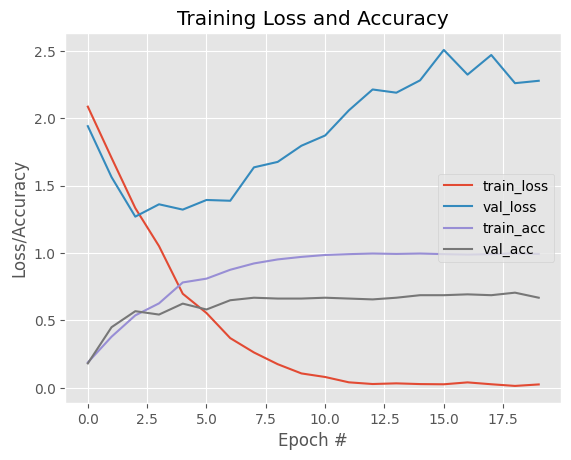

In [16]:
# plot the training loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")